<a href="https://colab.research.google.com/github/virtikam-commits/vartika-Mishra/blob/main/Copy_of_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gensim

In [ ]:
pip install nltk

In [ ]:
pip install --upgrade pip

In [ ]:
pip install svgling

In [ ]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
corpus =  [

    "AI-assisted legal research helps lawyers analyze case laws more efficiently.",
    "AI is used in astronomy to analyze vast amounts of cosmic data.",
    "Smart homes use AI for automation and energy efficiency .",
    "AI is revolutionizing the way people search for information online.",
    "AI-based handwriting recognition improves digitization and document processing.",
    "The use of AI in wildlife conservation helps monitor endangered species.",
    "AI is shaping the future of content creation in journalism and storytelling.",
    "AI-driven job matching platforms help connect candidates with suitable employers.",
    "The financial sector uses AI to assess credit risk and detect fraudulent transactions.",
    "AI in manufacturing enhances efficiency and reduces production errors.",
    "Wearable technology powered by AI helps monitor personal health metrics.",
    "The role of AI in sports analytics improves team performance analysis.",
    "AI is helping researchers discover new materials and chemical compounds.",
    "AI in law enforcement aids in criminal investigations and predictive policing.",
    "AI-driven autonomous ships are transforming maritime transportation.",
    "AI-powered smart grids enhance energy distribution and consumption efficiency.",

]


In [ ]:
s = "my name is * Neeraj + kumar 453 % 54345."
s.upper()

'MY NAME IS * NEERAJ + KUMAR 453 % 54345.'

In [ ]:
re.sub(r'\d+',"",s)

'my name is * Neeraj + kumar  % .'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
s= s.translate(str.maketrans("","",string.punctuation))

In [ ]:
s

'my name is  Neeraj  kumar 453  54345'

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize(s)

['my', 'name', 'is', 'Neeraj', 'kumar', '453', '54345']

In [ ]:
s1 = ['my', 'name', 'is', 'Neeraj', 'kumar', '453', '54345', '.']

In [ ]:
[i for i in s1 if i not in stopwords.words('english')]

['name', 'Neeraj', 'kumar', '453', '54345', '.']

In [ ]:
def word_prepprocessing(text) :
    text = text.lower()
    text = re.sub(r'\d+',"",text)
    text = text.translate(str.maketrans("","",string.punctuation))
    word = word_tokenize(text)
    word = [ i for i in word if i not in stopwords.words('english')]
    return word

In [ ]:
word_prepprocessing("AI-assisted legal research helps lawyers analyze case laws more efficiently.")

['aiassisted',
 'legal',
 'research',
 'helps',
 'lawyers',
 'analyze',
 'case',
 'laws',
 'efficiently']

In [ ]:

corpus

['AI-assisted legal research helps lawyers analyze case laws more efficiently.',
 'AI is used in astronomy to analyze vast amounts of cosmic data.',
 'Smart homes use AI for automation and energy efficiency .',
 'AI is revolutionizing the way people search for information online.',
 'AI-based handwriting recognition improves digitization and document processing.',
 'The use of AI in wildlife conservation helps monitor endangered species.',
 'AI is shaping the future of content creation in journalism and storytelling.',
 'AI-driven job matching platforms help connect candidates with suitable employers.',
 'The financial sector uses AI to assess credit risk and detect fraudulent transactions.',
 'AI in manufacturing enhances efficiency and reduces production errors.',
 'Wearable technology powered by AI helps monitor personal health metrics.',
 'The role of AI in sports analytics improves team performance analysis.',
 'AI is helping researchers discover new materials and chemical compoun

In [ ]:
processed_corpus = [word_prepprocessing(sentence) for sentence in corpus]

In [ ]:
processed_corpus

[['aiassisted',
  'legal',
  'research',
  'helps',
  'lawyers',
  'analyze',
  'case',
  'laws',
  'efficiently'],
 ['ai', 'used', 'astronomy', 'analyze', 'vast', 'amounts', 'cosmic', 'data'],
 ['smart', 'homes', 'use', 'ai', 'automation', 'energy', 'efficiency'],
 ['ai', 'revolutionizing', 'way', 'people', 'search', 'information', 'online'],
 ['aibased',
  'handwriting',
  'recognition',
  'improves',
  'digitization',
  'document',
  'processing'],
 ['use',
  'ai',
  'wildlife',
  'conservation',
  'helps',
  'monitor',
  'endangered',
  'species'],
 ['ai',
  'shaping',
  'future',
  'content',
  'creation',
  'journalism',
  'storytelling'],
 ['aidriven',
  'job',
  'matching',
  'platforms',
  'help',
  'connect',
  'candidates',
  'suitable',
  'employers'],
 ['financial',
  'sector',
  'uses',
  'ai',
  'assess',
  'credit',
  'risk',
  'detect',
  'fraudulent',
  'transactions'],
 ['ai',
  'manufacturing',
  'enhances',
  'efficiency',
  'reduces',
  'production',
  'errors'],


In [ ]:
word2vec_cbow = Word2Vec(sentences=processed_corpus ,vector_size=100 , window=10,min_count=1,sg=0)
word2vec_skipgram = Word2Vec(sentences=processed_corpus ,vector_size=100 , window=10,min_count=1,sg=1)

In [ ]:
word2vec_cbow

In [ ]:
word2vec_skipgram

In [ ]:
word2vec_skipgram.vector_size

100

In [ ]:
word2vec_cbow.wv['homes']

array([-6.5224119e-03,  8.9199394e-03, -1.5870739e-03, -8.2805743e-03,
        8.0120992e-03, -2.9590419e-03, -1.3266486e-03, -6.7452335e-04,
        2.8250306e-03, -4.7217896e-03, -2.5856390e-04, -2.8454361e-03,
        8.7754391e-03,  6.8772254e-03,  1.0986293e-03, -6.0721869e-03,
        3.1351009e-03,  1.1402296e-03, -6.1226632e-03, -5.7558659e-03,
       -3.0944108e-03,  2.3838617e-03, -8.1123225e-03, -4.9894364e-03,
        8.1011234e-03, -3.6942828e-03,  7.9564974e-03,  5.3434685e-04,
       -5.5392152e-03, -4.9589868e-03, -2.1490621e-04,  4.5961412e-03,
       -6.0757645e-03, -5.5144816e-03, -6.8142866e-03,  6.7477310e-03,
       -2.4093285e-03,  4.0178844e-03, -1.6262511e-03, -7.4179270e-03,
       -1.2657228e-03,  4.0418119e-04,  3.5843425e-03, -8.6759906e-03,
       -6.8022679e-03, -6.5592858e-03,  2.9969607e-03, -3.7477124e-03,
        1.0214312e-03,  4.1572847e-03,  4.5201629e-03,  2.3639950e-03,
       -2.8702957e-03,  6.3314295e-04, -5.3964211e-03, -6.3508195e-03,
      

In [ ]:
word2vec_cbow.wv.similarity("homes","ai")

-0.0009017396

In [ ]:


word2vec_cbow.wv.index_to_key

['ai',
 'helps',
 'efficiency',
 'use',
 'energy',
 'monitor',
 'aidriven',
 'analyze',
 'improves',
 'smart',
 'wildlife',
 'processing',
 'conservation',
 'document',
 'digitization',
 'endangered',
 'species',
 'recognition',
 'future',
 'content',
 'creation',
 'journalism',
 'storytelling',
 'job',
 'matching',
 'platforms',
 'help',
 'connect',
 'shaping',
 'legal',
 'research',
 'lawyers',
 'case',
 'laws',
 'efficiently',
 'used',
 'astronomy',
 'vast',
 'amounts',
 'information',
 'data',
 'homes',
 'automation',
 'revolutionizing',
 'way',
 'people',
 'search',
 'aiassisted',
 'online',
 'aibased',
 'handwriting',
 'cosmic',
 'analysis',
 'helping',
 'researchers',
 'discover',
 'new',
 'materials',
 'chemical',
 'compounds',
 'law',
 'enforcement',
 'aids',
 'criminal',
 'candidates',
 'predictive',
 'policing',
 'autonomous',
 'ships',
 'transforming',
 'maritime',
 'transportation',
 'aipowered',
 'grids',
 'enhance',
 'distribution',
 'consumption',
 'investigations',
 's

In [ ]:

word2vec_cbow.wv.most_similar("energy",topn=5)

[('credit', 0.26993024349212646),
 ('document', 0.2531557083129883),
 ('help', 0.2011045217514038),
 ('amounts', 0.19584107398986816),
 ('research', 0.1754082590341568)]

In [ ]:
word2vec_skipgram.wv.most_similar("helps",topn=5)

[('connect', 0.18901968002319336),
 ('storytelling', 0.18874797224998474),
 ('cosmic', 0.18377617001533508),
 ('analytics', 0.18304216861724854),
 ('powered', 0.17799314856529236)]

In [ ]:
corpus

['AI-assisted legal research helps lawyers analyze case laws more efficiently.',
 'AI is used in astronomy to analyze vast amounts of cosmic data.',
 'Smart homes use AI for automation and energy efficiency .',
 'AI is revolutionizing the way people search for information online.',
 'AI-based handwriting recognition improves digitization and document processing.',
 'The use of AI in wildlife conservation helps monitor endangered species.',
 'AI is shaping the future of content creation in journalism and storytelling.',
 'AI-driven job matching platforms help connect candidates with suitable employers.',
 'The financial sector uses AI to assess credit risk and detect fraudulent transactions.',
 'AI in manufacturing enhances efficiency and reduces production errors.',
 'Wearable technology powered by AI helps monitor personal health metrics.',
 'The role of AI in sports analytics improves team performance analysis.',
 'AI is helping researchers discover new materials and chemical compoun

In [ ]:

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

word_vectors = word2vec_cbow.wv
vocab = list(word_vectors.index_to_key)

In [ ]:
len(vocab)

105

In [ ]:
x = np.array([word_vectors[i] for i in vocab])

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
x_new_embedings = tsne.fit_transform(x)

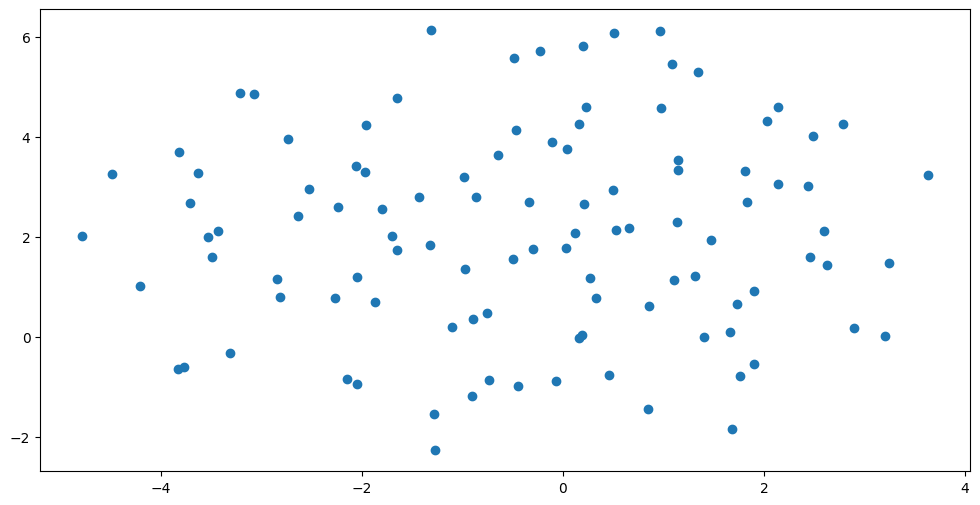

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedings[: , 0] , x_new_embedings[:,1] , marker='o')

In [ ]:
vocab

['ai',
 'helps',
 'efficiency',
 'use',
 'energy',
 'monitor',
 'aidriven',
 'analyze',
 'improves',
 'smart',
 'wildlife',
 'processing',
 'conservation',
 'document',
 'digitization',
 'endangered',
 'species',
 'recognition',
 'future',
 'content',
 'creation',
 'journalism',
 'storytelling',
 'job',
 'matching',
 'platforms',
 'help',
 'connect',
 'shaping',
 'legal',
 'research',
 'lawyers',
 'case',
 'laws',
 'efficiently',
 'used',
 'astronomy',
 'vast',
 'amounts',
 'information',
 'data',
 'homes',
 'automation',
 'revolutionizing',
 'way',
 'people',
 'search',
 'aiassisted',
 'online',
 'aibased',
 'handwriting',
 'cosmic',
 'analysis',
 'helping',
 'researchers',
 'discover',
 'new',
 'materials',
 'chemical',
 'compounds',
 'law',
 'enforcement',
 'aids',
 'criminal',
 'candidates',
 'predictive',
 'policing',
 'autonomous',
 'ships',
 'transforming',
 'maritime',
 'transportation',
 'aipowered',
 'grids',
 'enhance',
 'distribution',
 'consumption',
 'investigations',
 's

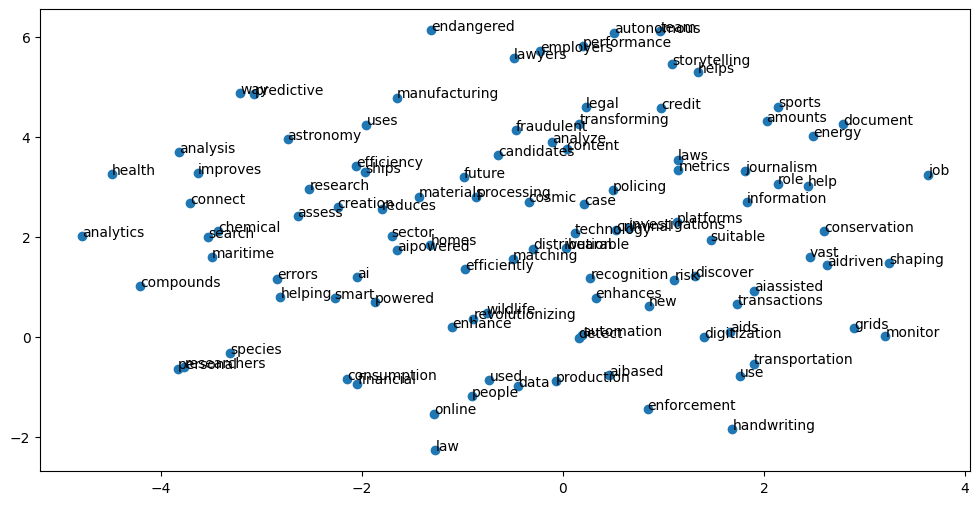

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedings[: , 0] , x_new_embedings[:,1] , marker='o')

for i ,words in enumerate(vocab[:len(x_new_embedings)]):
    plt.annotate(words,xy=(x_new_embedings[i,0],x_new_embedings[i,1]))
plt.show()

In [ ]:
text = "Barack Obama was the 44th President of the United States."

In [ ]:
word_tokenize(text)

['Barack',
 'Obama',
 'was',
 'the',
 '44th',
 'President',
 'of',
 'the',
 'United',
 'States',
 '.']

In [ ]:

from nltk import ne_chunk,pos_tag,word_tokenize

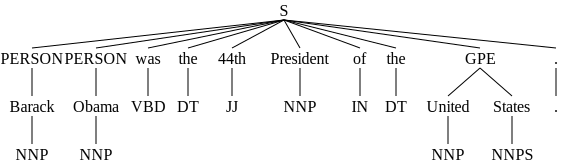

In [ ]:
(ne_chunk(pos_tag(word_tokenize(text))))